## Mapeamento dos pontos de alagamento do Bairro do Limão, localizado na Zona Norte da cidade de São Paulo

### Importando as bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Importando a Base de Dados

In [2]:
df = pd.read_csv(r'dados_2019-2025_tratado.csv', sep = ';')

#### Para este estudo foram coletados os dados mensais do Mirante de Santana, principal estação meteorológica do Instituto Nacional de Meteorologia (INMET) no município de São Paulo e também mais próximo ao Bairro do Limão. 
#### Essa estação coleta informações essenciais para a análise climática e hidrológica, como:
#### • Precipitação (chuvas)
#### • Umidade relativa do ar
#### • Radiação solar
#### • Pressão atmosférica
#### • Direção e velocidade dos ventos

#### Esses dados são fundamentais para compreender a dinâmica dos alagamentos, especialmente porque a precipitação é um dos principais fatores que contribuem diretamente para a ocorrência desses eventos.

In [3]:
df.head()

,Data_Medicao,Nebulosidade,Dias_PrecipPluv,Precipitacao_Total,Pressao_Atmosferica,Temperatura_Maxima,Temperatura_Compensada,Temperatura_Minima,Umidade,Vento_VelMaxima,Vento_VelMedia
0,31/01/2019,6.8,NaN,305.9,926.1,31.9,25.2,20.4,74.0,5.8,1.9
1,28/02/2019,7.7,NaN,323.2,924.3,28.6,23.2,19.6,75.4,5.0,2.2
2,31/03/2019,8.5,NaN,239.6,926.3,28.4,22.9,19.3,76.8,5.0,2.4
3,30/04/2019,7.4,NaN,148.1,925.6,27.8,22.5,18.9,74.6,4.8,2.0
4,31/05/2019,8.0,NaN,53.7,926.5,25.6,20.6,17.2,74.8,5.0,2.0


Infelizmente a estação não coletou dados de abril/2020 até março/2021, não há informações sobre o porquê disso. Porém em seu boletim de junho/2020, houve um recorde da série histórica, iniciada em 1943, no qual em 24 horas choveu aproximadamente 89,6 mm apenas na manhã do dia 27/07/2020 e o acumulado foi de 152,4 mm, o que corresponde a cerca de 300% do valor da referência normal de 50,3 mm.

A média das temperaturas máximas nesse mês foi de 24,3°C, bem acima da climatologia de 22,6°C. E as temperaturas mínimas, fecharam o mês com média de 15,7°C, enquanto que sua climatologia é de 13,0°C. Dessa forma, o mês fecha com o recorde mais elevado dessa variável para um mês de junho. O maior valor até então havia sido registrado em 2002, com 15,6 °C.

#### Apesar de o clima ser um fator natural importante, principalmente a precipitação — que atua como o principal condicionante para a ocorrência de inundações e alagamentos —, é importante destacar que os impactos enfrentados pela população muitas vezes são agravados pelas próprias ações humanas, como o crescimento desordenado e a ocupação de áreas de risco.

In [4]:
df['data_formatada'] = pd.to_datetime(df['Data_Medicao'], format='%d/%m/%Y', errors='coerce')

In [5]:
# Média da Precipitação Anual
df['ano'] = df['data_formatada'].dt.year
precipitacao_anual = df.groupby('ano')['Precipitacao_Total'].mean().reset_index()

C:\Users\carol\AppData\Local\Temp\ipykernel_2912\3306353974.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig1 = sns.barplot(x='ano', y='Precipitacao_Total', data=precipitacao_anual, palette='Blues_d')


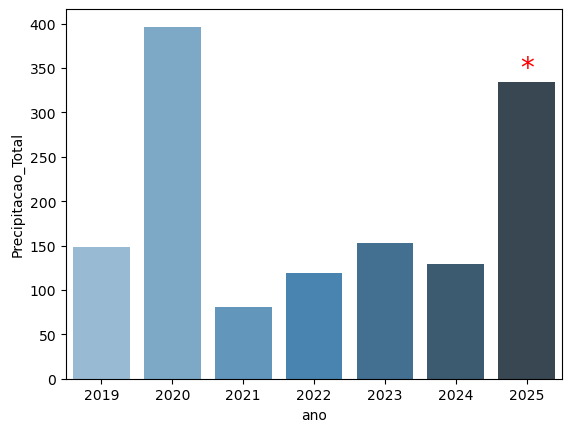

In [6]:
fig1 = sns.barplot(x='ano', y='Precipitacao_Total', data=precipitacao_anual, palette='Blues_d')
for bar, ano in zip(fig1.patches, precipitacao_anual['ano']):
    if ano == 2025:
        x = bar.get_x() + bar.get_width() / 2
        y = bar.get_height()
        fig1.annotate('*', (x, y), ha='center', va='bottom', fontsize=20, color='red')

*Mesmo estando apenas no mês de março de 2025, optei por manter no estudo os dados referentes aos meses de janeiro e fevereiro, pois, nesse curto período, foram registrados eventos climáticos extremos na cidade de São Paulo, o que evidencia a importância de incluir essas informações na análise.

"A Defesa Civil informou que, em 24 de janeiro de 2025, a capital registrou 125,4 mm de chuva em apenas um dia, o terceiro maior volume desde o início da série histórica, em 1961. A Zona Norte, região onde se localiza o Bairro do Limão, foi uma das mais afetadas, com ruas alagadas, veículos arrastados pela enxurrada e até a formação de uma "cachoeira" em escadarias do metrô.

Segundo o Instituto Nacional de Meteorologia (Inmet), fevereiro de 2025 foi o mais quente dos últimos 82 anos. Além disso, em apenas dois dias, choveu 65% do volume esperado para o mês inteiro, causando sérios transtornos urbanos".

Dessa forma, a inclusão dos dados de 2025 contribui de forma significativa para a compreensão do cenário atual e reforça a necessidade de estudos que correlacionem a precipitação intensa, a urbanização e os pontos de alagamento, principalmente em bairros vulneráveis como o Limão.

In [7]:
df['ano'] = df['data_formatada'].dt.year
df['meses'] = df['data_formatada'].dt.month
meses = {1:'Jan', 2:'Fev'}
df['meses'] = df['meses'].map(meses)
precip_mensal = df.groupby(['ano', 'meses'])['Precipitacao_Total'].mean().reset_index()

<Axes: xlabel='ano', ylabel='Precipitacao_Total'>

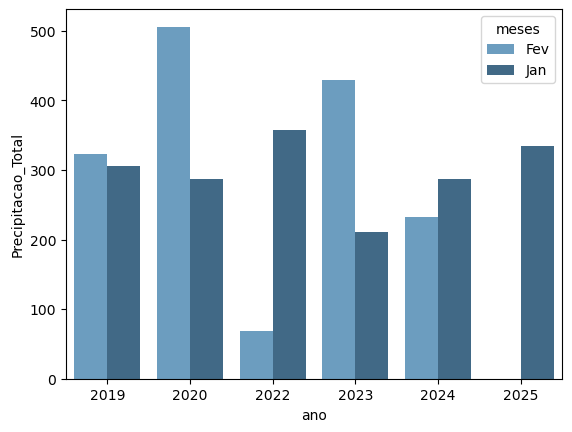

In [8]:
sns.barplot(x='ano', y='Precipitacao_Total', data=precip_mensal, hue = 'meses', palette='Blues_d') 
# o parâmetro hue é usado para diferenciar categorias dentro de uma variável numérica.

### Correlação entre Temperatura e Umidade
### Temperaturas elevadas combinadas com alta umidade podem agravar o desconforto térmico e aumentar riscos de problemas de saúde, como desidratação e golpes de calor. Além disso, uma correlação crescente entre temperatura e umidade pode ser um indicativo das mudanças climáticas, mostrando um aumento do calor mais intensificado. Isso pode levar a medidas de mitigação para proteger a população.

In [9]:
df_corr = df.dropna(subset=['Temperatura_Maxima', 'Umidade'])

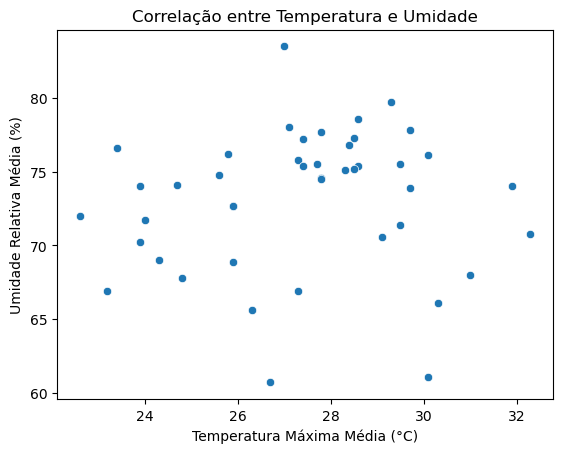

In [10]:
sns.scatterplot(x='Temperatura_Maxima', y='Umidade', data=df_corr)
plt.title('Correlação entre Temperatura e Umidade')
plt.xlabel('Temperatura Máxima Média (°C)')
plt.ylabel('Umidade Relativa Média (%)')
plt.show()

In [11]:
# Comparativo Precipitação Acumulada por Mês/Ano
df['mes_nome'] = df['data_formatada'].dt.month
meses = {1:'Jan', 2:'Fev', 3:'Mar', 4:'Abr', 5:'Mai', 6:'Jun',
         7:'Jul', 8:'Ago', 9:'Set', 10:'Out', 11:'Nov', 12:'Dez'}
df['mes_nome'] = df['mes_nome'].map(meses)
ordem_meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
precip_total = df.groupby(['ano', 'mes_nome'])['Precipitacao_Total'].sum().reset_index()
precip_total['mes_nome'] = pd.Categorical(precip_total['mes_nome'], categories=ordem_meses, ordered=True)

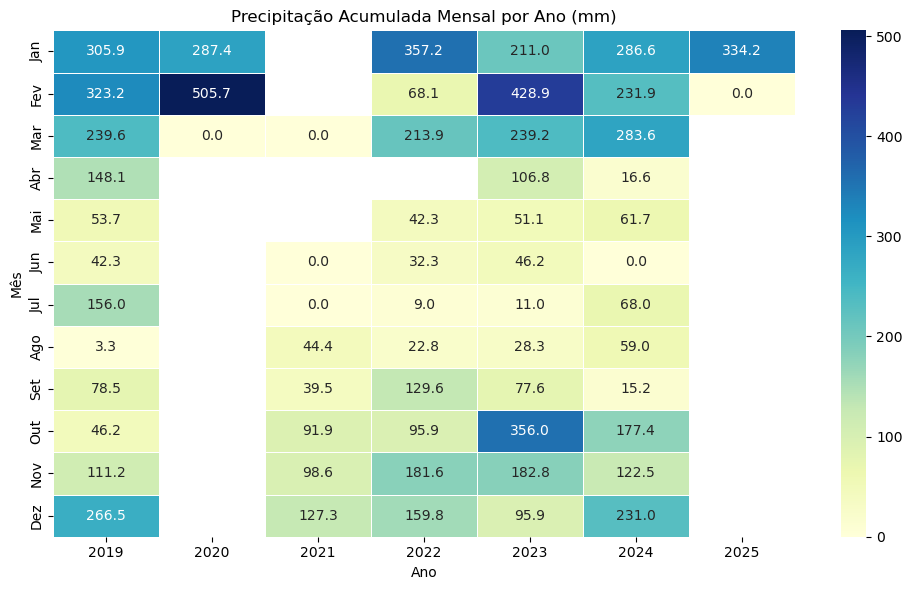

In [12]:
pivot_precip = precip_total.pivot(index='mes_nome', columns='ano', values='Precipitacao_Total')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_precip, annot=True, fmt=".1f", cmap='YlGnBu', linewidths=0.5)
plt.title('Precipitação Acumulada Mensal por Ano (mm)')
plt.ylabel('Mês')
plt.xlabel('Ano')
plt.tight_layout()
plt.show()

De acordo com o heatmap, a maior parte das precipitações intensas ocorrem no verão, mas principalmente nos meses de janeiro e fevereiro. Mesmo com dados parciais, 2025 ja apresenta uma precipitação alta para o mês de janeiro, indicando que mais alagamentos em 2025 são esperados.
Tanto 2020 quanto 2025 destacam-se por eventos de precipitação intensa, reforçando a relação entre urbanização e impermeabilização do solo e risco de alagamentos.

Segundo o INMET, em fevereiro de 2020, São Paulo registrou um mês histórico em termos de chuva, segundo o INMET. O acumulado de precipitação na estação meteorológica do Mirante de Santana foi de 505,7 mm, tornando o mês o mais chuvoso dos 77 anos de medições, com registros desde 1943. Esse total superou em muito a Normal Climatológica para o período de 1981 a 2010, que é de 249,7 mm. Além disso, o mês de fevereiro de 2020 quebrou o recorde anterior, que era de 445,5 mm, registrado em 1995.

Além da intensa chuva, as temperaturas máximas em fevereiro de 2020 também foram mais baixas do que as de anos anteriores, sendo as menores desde 2004. Esse conjunto de fatores meteorológicos fez do mês de fevereiro de 2020 um mês excepcional, tanto em termos de precipitação quanto em temperaturas.

Esse boletim está anexado no repositório

### Agora que já temos uma análise do Mirante de Santana, durante o período de jan/2019 a fev/2025, irei começar a análise do Bairro do Limão

A urbanização do Bairro do Limão, assim como da Casa Verde, consolidou-se de forma mais ampla na década de 1980, impulsionando a expansão do comércio, da indústria e da empregabilidade. Esse crescimento aumentou a demanda por mão de obra e contribuiu para suprir necessidades da população.

Com o desenvolvimento acelerado da região, as construções avançaram em ritmo mais rápido do que a implantação dos sistemas de drenagem e saneamento básico. Como consequência, alagamentos e enchentes tornaram-se frequentes, especialmente no verão, período de chuvas intensas. A baixa permeabilidade do solo é um dos principais fatores desse problema, agravado pela escassez de bueiros, pelo entupimento dos existentes e pelo sistema de drenagem sobrecarregado.

Além de dificultar a mobilidade nas ruas, as enchentes invadem residências e comércios, trazendo à tona resíduos e atraindo pragas que podem causar doenças. Os entupimentos ocorrem com frequência durante o período chuvoso, não apenas pelo grande volume de água, mas também pelo descarte inadequado de lixo pela população.

Para esta análise, os dados foram coletados manualmente a partir do Histórico de Alagamentos (https://www.cgesp.org/v3/alagamentos.jsp) e dos registros de Pluviometria (https://arquivos.saisp.br/nextcloud/index.php/s/qikdinFyAM33MJK?path=%2FBOLETIM_PLUVIOMETRICO), disponíveis no site do Centro de Gerenciamento de Emergências Climáticas (CGE). A coleta foi realizada considerando como referência o bairro da Casa Verde, que, apesar de ser vizinho, no sistema do CGE, diversas ruas citadas como Casa Verde na realidade, pertencem ao Bairro do Limão.

In [13]:
df_bairro = pd.read_csv(r'historicoalagamento20192025.csv', sep = ";")

In [14]:
df_bairro.head()

,Data,Endereco,Sentido,referencia,Hora_inicio,Hora_fim,Classificacao
0,17/01/2019,MARGINAL TIETE,A SENNA,PTE CASA VERDE,18:32,21:53,TRANSITAVEL
1,17/01/2019,AV ANTONIO MUNHOZ BONILHA,AMBOS,AV NSRA DO O,18:41,19:02,INTRANSITAVEL
2,17/01/2019,AV NSRA DO O,AMBOS,AV ANTONIO MUNHOZ BONILHA,18:58,19:02,INTRANSITAVEL
3,17/01/2019,AV NSRA DO O,CENTRO,AV PROF CELESTINO BOURROUL,19:09,19:42,TRANSITAVEL
4,30/01/2019,AV NSRA DO O,CENTRO,AV PROF CELESTINO BOURROUL,17:12,18:02,INTRANSITAVEL


Segundo o site do CGE, as  informações quanto a Classificação dos alagamentos são fornecidas pelos agentes de trânsito da Prefeitura de São Paulo, que encaminham os dados para um sistema. As informações são coletadas com foco nas PRINCIPAIS VIAS da cidade, como o centro expandido, e nos principais corredores de tráfego da cidade.
TRANSITÁVEL signinfica que o acúmulo de águas não toma todas as pistas da via, e assim sendo, o tráfego de veículos permanece liberado no local
INTRANSITÁVEL significa que o alagamento toma todas as pistas da via, impedindo totalmente o trânsito de veículos naquele local

In [16]:
# Antes de iniciarmos a análise, devo converter as horas em datetime
df_bairro['Hora_inicio'] = pd.to_datetime(df_bairro['Hora_inicio'], format = '%H:%M')
df_bairro['Hora_fim'] = pd.to_datetime(df_bairro['Hora_fim'], format = '%H:%M')

# %H: 2-digit hour (00-23) e %M: 2-digit minute (00-59)

In [17]:
df_bairro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Data           206 non-null    object        
 1   Endereco       206 non-null    object        
 2   Sentido        206 non-null    object        
 3   referencia     206 non-null    object        
 4   Hora_inicio    206 non-null    datetime64[ns]
 5   Hora_fim       206 non-null    datetime64[ns]
 6   Classificacao  206 non-null    object        
dtypes: datetime64[ns](2), object(5)
memory usage: 11.4+ KB


In [18]:
df_bairro['Data'] = pd.to_datetime(df_bairro['Data'], format = '%d/%m/%Y')

In [19]:
df_bairro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Data           206 non-null    datetime64[ns]
 1   Endereco       206 non-null    object        
 2   Sentido        206 non-null    object        
 3   referencia     206 non-null    object        
 4   Hora_inicio    206 non-null    datetime64[ns]
 5   Hora_fim       206 non-null    datetime64[ns]
 6   Classificacao  206 non-null    object        
dtypes: datetime64[ns](3), object(4)
memory usage: 11.4+ KB


### Quais os locais que tiveram mais alagamentos?

In [20]:
local_frequente = df_bairro['Endereco'].value_counts().head(5)
print(local_frequente)

Endereco
MARGINAL TIETE               55
AV ANTONIO MUNHOZ BONILHA    55
AV ORDEM E PROGRESSO         19
AV NSRA DO O                 13
AV INAJAR DE SOUZA           10
Name: count, dtype: int64


In [21]:
# Em questão de porcentagem
local_frequente_porcentagem = df_bairro['Endereco'].value_counts(normalize = True).head(5)* 100
print(local_frequente_porcentagem)

Endereco
MARGINAL TIETE               26.699029
AV ANTONIO MUNHOZ BONILHA    26.699029
AV ORDEM E PROGRESSO          9.223301
AV NSRA DO O                  6.310680
AV INAJAR DE SOUZA            4.854369
Name: proportion, dtype: float64


In [22]:
df_bairro2 = pd.DataFrame(local_frequente)
df_bairro2

,count
Endereco,
MARGINAL TIETE,55
AV ANTONIO MUNHOZ BONILHA,55
AV ORDEM E PROGRESSO,19
AV NSRA DO O,13
AV INAJAR DE SOUZA,10


([0, 1, 2, 3, 4],
 [Text(0, 0, 'MARGINAL TIETE'),
  Text(1, 0, 'AV ANTONIO MUNHOZ BONILHA'),
  Text(2, 0, 'AV ORDEM E PROGRESSO'),
  Text(3, 0, 'AV NSRA DO O'),
  Text(4, 0, 'AV INAJAR DE SOUZA')])

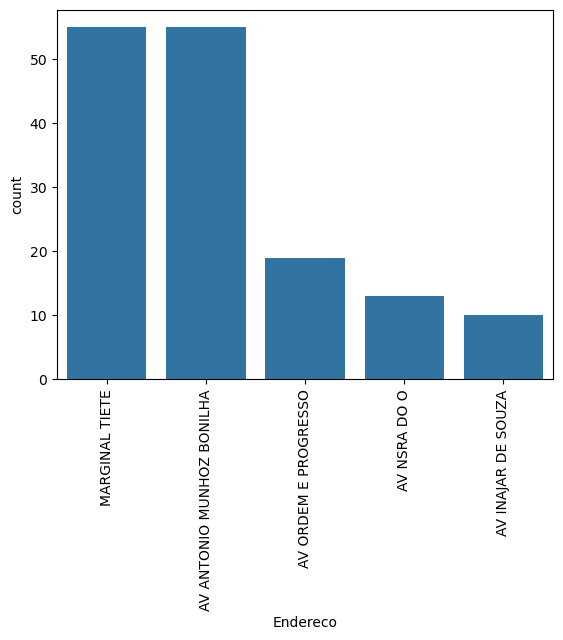

In [23]:
figlocal = sns.barplot (x='Endereco', y='count', data=df_bairro2)
plt.xticks(rotation = 90)

### Contando os alagamentos INTRANSITÁVEIS, ou seja, que impedem totalmente o trânsito de veículos naquele local

In [24]:
intransitaveis = df_bairro[df_bairro['Classificacao'] == 'INTRANSITAVEL']

In [25]:
local_intransitavel = intransitaveis['Endereco'].value_counts().head(5)
print(local_intransitavel)

Endereco
AV ANTONIO MUNHOZ BONILHA    35
MARGINAL TIETE               12
AV ORDEM E PROGRESSO         12
AV NSRA DO O                  9
R BARTHOLOMEU DO CANTO        6
Name: count, dtype: int64


C:\Users\carol\AppData\Local\Temp\ipykernel_2912\3945103380.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=local_intransitavel.index, y=local_intransitavel.values, palette='Blues')


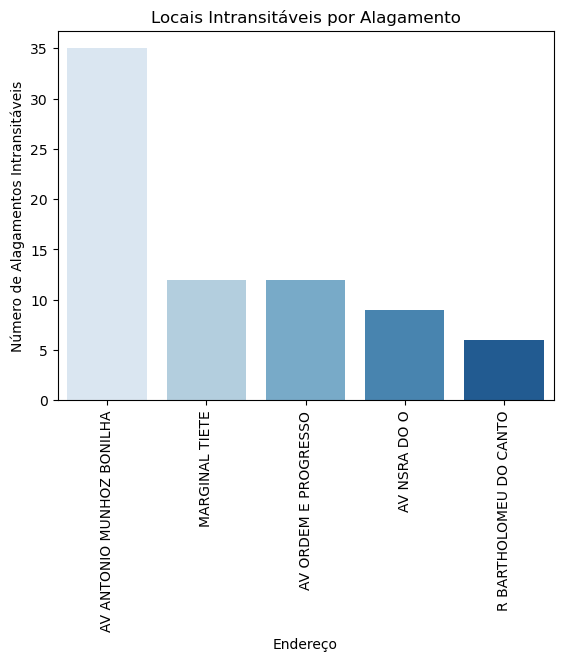

In [26]:
sns.barplot(x=local_intransitavel.index, y=local_intransitavel.values, palette='Blues')
plt.title('Locais Intransitáveis por Alagamento')
plt.xlabel('Endereço')
plt.ylabel('Número de Alagamentos Intransitáveis')
plt.xticks(rotation = 90)
plt.show()

### Qual a duração média dos alagamentos?

In [28]:
df_bairro.loc[df_bairro['Hora_fim'] < df_bairro['Hora_inicio'], 'Hora_fim'] += pd.Timedelta(days=1) #cria um intervalo de 1 dia. 
#aplica somente onde a condição é verdadeira (Hora_fim < Hora_inicio).
df_bairro['Duracao'] = (df_bairro['Hora_fim'] - df_bairro['Hora_inicio']).dt.total_seconds() / 60 

In [29]:
duracao_media = df_bairro.groupby('Endereco')['Duracao'].mean().sort_values(ascending=False)
print(duracao_media)

Endereco
R DR FREIRE CISNEIRO                  580.000000
R JOAO DUARTE                         372.000000
R BRAZELISA ALVES DE CARVALHO         225.000000
AV NSRA DO O                          182.846154
MARGINAL TIETE                        131.036364
AV ORDEM E PROGRESSO                  125.947368
R SUSANA DE GOIS                       98.000000
AV ANTONIO MUNHOZ BONILHA              93.200000
R CESAR PENNA RAMOS                    87.000000
R CEL JOAQUIM DE FREITAS               81.000000
R QUIRINOPOLIS                         80.000000
AV INAJAR DE SOUZA                     76.700000
R SAMARITA                             75.000000
AV ENG CAETANO ALVARES                 73.000000
R BARTHOLOMEU DO CANTO                 70.166667
AV BRAZ LEME                           69.333333
R CORREIA DE SA                        68.250000
AV OTAVIANO ALVES DE LIMA              56.800000
AVENIDA ENGENHEIRO CAETANO ALVARES     50.000000
R MATEUS MASCARENHAS                   48.000000
R NELSON FR

C:\Users\carol\AppData\Local\Temp\ipykernel_2912\4124320048.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=duracao_media.index, y=duracao_media.values, palette='crest')


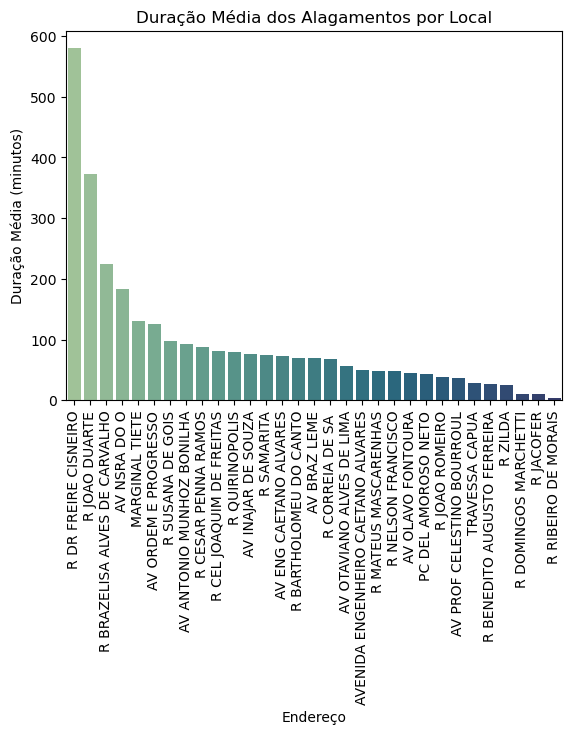

In [30]:
sns.barplot(x=duracao_media.index, y=duracao_media.values, palette='crest')
plt.title('Duração Média dos Alagamentos por Local')
plt.xlabel('Endereço')
plt.ylabel('Duração Média (minutos)')
plt.xticks(rotation=90)
plt.show()

#### Mas por que a cidade de São Paulo não consegue evitar as enchentes mesmo depois de tantos anos?

As enchentes fazem parte da história da cidade de São Paulo. Todos os anos, especialmente entre dezembro e março, os noticiários reportam diversas áreas alagadas. No entanto, a enchente mais marcante ainda é a de 1929.

Naquele ano, o Rio Tietê atingiu 3,45 metros acima do nível normal, afetando bairros como Casa Verde, Canindé, Ponte Pequena, Barra Funda, Lapa, Vila Maria e Vila Anastácio. Na Freguesia do Ó e no Bairro do Limão, os moradores precisaram de barcos fornecidos pela Prefeitura para se locomover, pois muitas casas estavam quase completamente submersas.

Outros anos também registraram grandes enchentes. Em 1983, chuvas intensas provocaram alagamentos comparáveis aos de 1929, 1970 e 1972, resultando em prejuízos materiais. Já em 2016, a situação foi mais grave: pelo menos 17 pessoas perderam a vida devido ao transbordamento do rio na madrugada de 11 de março, atingindo regiões como a Ponte Presidente Dutra, Ponte do Limão, Barragem Móvel e Ponte Cidade Universitária.

Em abril de 2017, a cidade registrou 84 mm de chuva — acima da média mensal de 73 mm — causando transbordamentos em três pontos da Marginal: Ponte do Piqueri, Barragem Móvel Montante e Barragem Móvel Jusante. Em 2020, São Paulo enfrentou a segunda maior chuva de fevereiro em 37 anos, acumulando 121,8 mm em um único dia, um volume próximo ao previsto para todo o mês.

Já em 2025, a Marginal do Rio Tietê apresentou alagamentos intransitáveis de forma generalizada, embora, segundo a Secretaria de Meio Ambiente, Infraestrutura e Logística do Estado de São Paulo, não tenha havido transbordamento do rio. A enchente foi causada pelo colapso da rede de microdrenagem da marginal.

O crescimento desordenado da cidade resultou em ocupações irregulares em encostas e várzeas de rios e córregos, alterando o fluxo natural das águas que escoam para o Tietê. Os chamados piscinões, projetados para represar a água da chuva, são frequentemente citados como uma solução, mas hoje fazem parte do problema devido à falta de manutenção e capacidade limitada.

Os pesquisadores da Universidade de São Paulo (USP) analisaram dados de precipitação, capacidade de drenagem e a infraestrutura existente ao longo de um trecho de 30 km da Marginal. Entre os principais achados, destacam-se:

- Rede de drenagem subdimensionada: Incapaz de suportar chuvas intensas, causando alagamentos de até 80 cm.

- Entupimentos frequentes: Cerca de 40% dos bueiros estão obstruídos por lixo e sedimentos, dificultando o escoamento da água.

- Falta de manutenção regular: A ausência de um plano preventivo reduz a eficiência da infraestrutura existente.

- Áreas críticas: Pontes como Aricanduva e Tatuapé são frequentemente afetadas pelo acúmulo de água.

O estudo ressalta a necessidade de uma ação coordenada entre governo, universidades e sociedade civil para enfrentar os desafios da drenagem urbana. Sem uma abordagem integrada, os alagamentos continuarão comprometendo a mobilidade e a qualidade de vida dos paulistanos.

### Conclusão
A recorrência das enchentes em São Paulo evidencia falhas no planejamento urbano e na manutenção da infraestrutura de drenagem. O crescimento acelerado, aliado à impermeabilização do solo e ao descarte inadequado de resíduos, intensifica os alagamentos, afetando a mobilidade e a saúde pública. Para mitigar esses impactos, é essencial investir em sistemas de drenagem mais eficientes, manutenção preventiva e educação ambiental. Somente com ações coordenadas entre governo e sociedade será possível reduzir os danos e garantir uma cidade mais resiliente às chuvas.

### Referencias
BARRA BONITA. As enchentes do Rio Tietê. Disponível em: https://barrabonita.sp.gov.br/barrabonita/livro-100-anos-de-historia/as-enchentes-do-rio-tiete. Acesso em: 27 mar. 2025.

CBN SÃO PAULO. Após quatro anos, Rio Tietê volta a transbordar em São Paulo. 01 fev. 2025. Disponível em: https://cbn.globo.com/sao-paulo/noticia/2025/02/01/apos-quatro-anos-rio-tiete-volta-a-transbordar-em-sao-paulo.ghtml. Acesso em: 27 mar. 2025.

G1 SÃO PAULO. Cidade de SP entra em estado de atenção para alagamentos. 14 fev. 2025. Disponível em: https://g1.globo.com/sp/sao-paulo/noticia/2025/02/14/cidade-de-sp-entra-em-estado-de-atencao-para-alagamentos.ghtml. Acesso em: 27 mar. 2025.

G1 SÃO PAULO. São Paulo teve a maior enchente de sua história em 1929. Disponível em: https://g1.globo.com/sao-paulo/rios-de-sao-paulo/noticia/sao-paulo-teve-maior-enchente-de-sua-historia-em-1929.ghtml. Acesso em: 27 mar. 2025.

GAÚCHA ZH. Rios Tietê e Pinheiros transbordam pela primeira vez em mais de 10 anos. 11 mar. 2016. Disponível em: https://gauchazh.clicrbs.com.br/geral/noticia/2016/03/rios-tiete-e-pinheiros-transbordam-pela-1-vez-em-mais-de-10-anos-5082649.html. Acesso em: 27 mar. 2025.

JORNAL ESTADO DE MINAS. Temporal recorde em São Paulo causa dezenas de alagamentos e fecha Marginal. 10 fev. 2020. Disponível em: https://www.em.com.br/app/noticia/nacional/2020/02/10/interna_nacional,1120892/temporal-recorde-em-sao-paulo-causa-dezenas-de-alagamentos-e-fecha-mar.shtml. Acesso em: 27 mar. 2025.

MÍDIA NO BAIRRO. Sistema de drenagem da Marginal Tietê. Disponível em: https://midianobairro.com.br/noticias/sistema-de-drenagem-da-marginal-tiete/. Acesso em: 27 mar. 2025.

NOTÍCIAS UOL. Marginais Pinheiros e Tietê não alagavam juntas há 11 anos, diz CGE. 11 mar. 2016. Disponível em: https://noticias.uol.com.br/cotidiano/ultimas-noticias/2016/03/11/marginais-pinheiros-e-tiete-nao-alagavam-juntas-ha-11-anos-diz-cge.htm. Acesso em: 27 mar. 2025.

SÃO PAULO SÃO. A maior enchente de São Paulo aconteceu em 1929. Disponível em: https://saopaulosao.com.br/a-maior-enchente-de-sao-paulo-aconteceu-em-1929/. Acesso em: 27 mar. 2025.

SÃO PAULO. As enchentes na história de São Paulo. Disponível em: https://capital.sp.gov.br/web/cultura/w/patrimonio_historico/ladeira_memoria/8385. Acesso em: 27 mar. 2025.